In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering

Based on our previous knowledge, we can come up with new features. We will create the following new features:
* Total Income: As we observed during the EDA, we will combine ```ApplicantIncome``` and ```CoapplicantIncome```. If the total income is higher, the chances of approval might also be higher.
* EMI: It is the monthly amount that the applicant will have to repay. If the EMI is high, then people might find it difficult to pay. It is the ratio of ```LoanAmount``` and ```Loan_Amount_Term```.

In [2]:
data = pd.read_csv('./data/im_train.csv')
test = pd.read_csv('./data/im_test.csv')

In [3]:
## Total Income Feature
data['Total_Income'] = data['ApplicantIncome']+data['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome']+test['CoapplicantIncome']

<AxesSubplot: xlabel='Total_Income', ylabel='Count'>

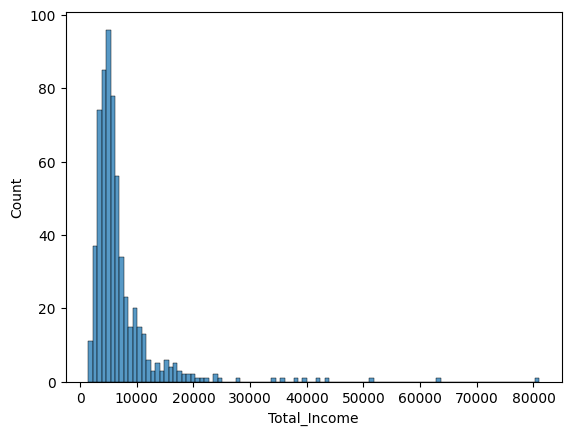

In [4]:
## Chek the distribution of Total Income
sns.histplot(data['Total_Income'])

We can see from the above plot that the distribution is right-skewed. To fix this we will do the log transformation.

In [5]:
data['Total_Income_log'] = np.log(data['Total_Income'])
test['Total_Income_log'] = np.log(test['Total_Income'])

<AxesSubplot: xlabel='Total_Income_log', ylabel='Count'>

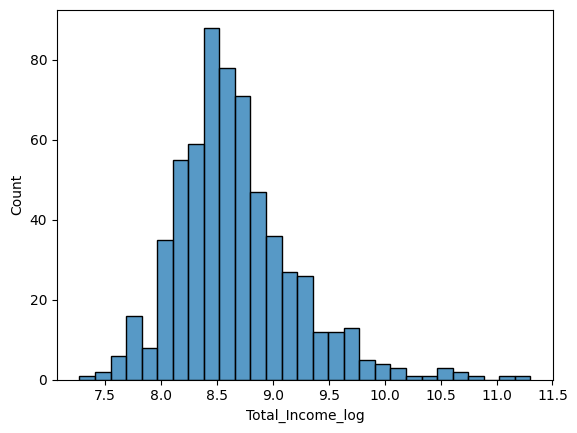

In [6]:
sns.histplot(data['Total_Income_log'])

We can see that the distribution is closer to normal.

In [7]:
## EMI Feature
data['EMI'] = data['LoanAmount'] / data['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']

<AxesSubplot: xlabel='EMI', ylabel='Count'>

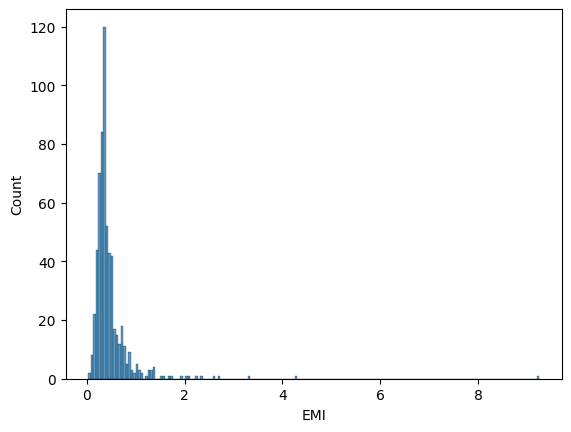

In [8]:
## Checking distribution of EMI
sns.histplot(data['EMI'])

In [9]:
## Dropping variables that were used to create new variables as there will be high correlation between them.
data = data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [11]:
data.to_csv('./data/fe_train.csv', index=False)
test.to_csv('./data/fe_test.csv', index=False)